In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
import os

In [13]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

In [14]:
print("Current Working Directory:",os.getcwd())

Current Working Directory: c:\Users\ASSASSIN\Desktop\folder


In [15]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [16]:
lables= training_set.class_names

In [17]:
print(lables)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [20]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [23]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3345 - loss: 1.2498 - val_accuracy: 0.3667 - val_loss: 0.9869
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.4883 - loss: 0.9907 - val_accuracy: 0.7400 - val_loss: 0.5775
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6339s 226s/step - accuracy: 0.7273 - loss: 0.6379 - val_accuracy: 0.8267 - val_loss: 0.4176
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8149 - loss: 0.4044 - val_accuracy: 0.6400 - val_loss: 0.9695
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7307 - loss: 0.6493 - val_accuracy: 0.8733 - val_loss: 0.3004
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9123 - loss: 0.2546 - val_accuracy: 0.9133 - val_loss: 0.2047
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9458 - loss: 0.1380 - val_accuracy: 0.9267 - val_loss: 0.1782
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9422 - loss: 0.1267 - val_accuracy: 0.8767 - val_

In [27]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 546ms/step - accuracy: 0.9251 - loss: 0.2448
Training accuracy: 0.9155555367469788


In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
epoch=[i for i in range(1,11)]

In [30]:
training_history.history

{'accuracy': [0.40666666626930237,
  0.5777778029441833,
  0.7488889098167419,
  0.8377777934074402,
  0.8022222518920898,
  0.903333306312561,
  0.9444444179534912,
  0.9311110973358154,
  0.9377777576446533,
  0.9599999785423279],
 'loss': [1.1075133085250854,
  0.8472915291786194,
  0.5730839967727661,
  0.3665435016155243,
  0.49178919196128845,
  0.2546863257884979,
  0.1380121409893036,
  0.15559805929660797,
  0.17365562915802002,
  0.10179119557142258],
 'val_accuracy': [0.36666667461395264,
  0.7400000095367432,
  0.8266666531562805,
  0.6399999856948853,
  0.8733333349227905,
  0.9133333563804626,
  0.9266666769981384,
  0.8766666650772095,
  0.9433333277702332,
  0.8899999856948853],
 'val_loss': [0.9868915677070618,
  0.5775213837623596,
  0.4175989031791687,
  0.9695391654968262,
  0.3003837466239929,
  0.20467951893806458,
  0.17818789184093475,
  0.2641918361186981,
  0.16424459218978882,
  0.33848515152931213]}

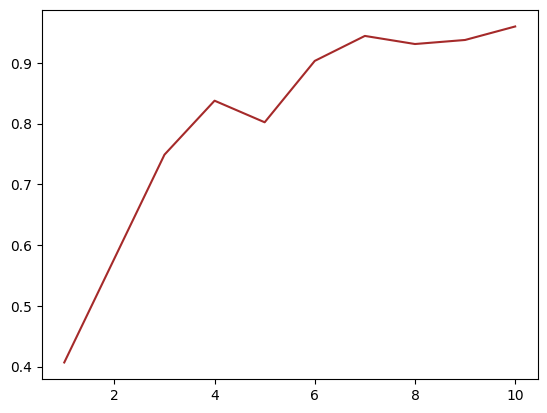

In [32]:
plt.plot(epoch,training_history.history['accuracy'],color='brown',label='Training Accuracy')

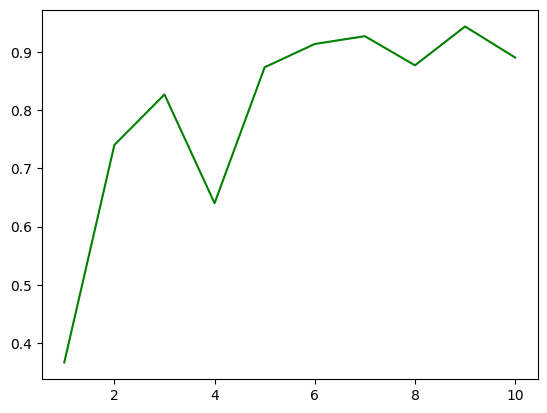

In [33]:
plt.plot(epoch,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')